<a href="https://colab.research.google.com/github/ArifAygun/Magnimind-ML/blob/main/AA_4_03_KernelSVMSt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kernel SVMS

In [1]:
# LınearSVC

# x1  x2

# w1*x1 + w1*x1

#polynomial features (degree 2)

# w1*x1 + w2*x2 + w3*x1^2 + w4*x2^2 w5*x1*x2 

In [2]:
# my number of coefficients are as many as my features
# let us say I have 3 features and 6 data points

#w = [w1 w2 w3]

#w1 = a1*d1 + a2*d2 +... + a6*d6

# I will find all a1, a2,a3,...and a6

# It turns out that most of the a's are coming zero 
# the non-zero a's are the ones that correspond to "support vectors"


In [3]:
# x:Age1
# phi(x1) = Age1^0, sqrt(2)*Age1, Age1^2

In [4]:
# x:Age2
# phi(2) = Age2^0, sqrt(2)*Age2, Age2^2

In [5]:
# x1.dot(x2) = Age1^0*Age2^0 + 2*Age1*Age2 + Age1^2*Age2^2

In [6]:
# x1.dot(x2) = 1*1 + 2*Age1*Age2 + Age1^2*Age2^2

In [7]:
# x1.dot(x2) = (1+Age1*Age2)^2. ---> just found a kernel function

In [8]:
# (x+y)^2 = x^2 + 2*x*y +y^2

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["savefig.dpi"] = 300
plt.rcParams['savefig.bbox'] = 'tight'

In [10]:
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_blobs

## Example 1

Let us create blobs using `make_blobs` function from Scikitlearn. We will plot the scatter plot for the blobs using the two features of the dataset.

In [11]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt


In [12]:
import numpy as np

X,y=make_blobs(random_state=3)
y = (y==0).astype(np.int)

<ipython-input-12-2768c760d5f1>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (y==0).astype(np.int)


In [13]:
y


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [14]:
y==0

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True, False, False,  True, False,  True,  True,  True,
       False,  True,  True, False, False,  True,  True,  True,  True,
       False, False, False,  True,  True,  True, False, False,  True,
        True, False,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True, False, False, False,  True, False,
       False,  True, False,  True,  True, False,  True,  True,  True,
       False,  True, False, False,  True, False,  True,  True, False,
       False, False, False,  True, False,  True,  True, False,  True,
       False,  True,  True,  True,  True,  True,  True, False,  True,
        True])

In [15]:
(y==0).astype(np.int32)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1], dtype=int32)

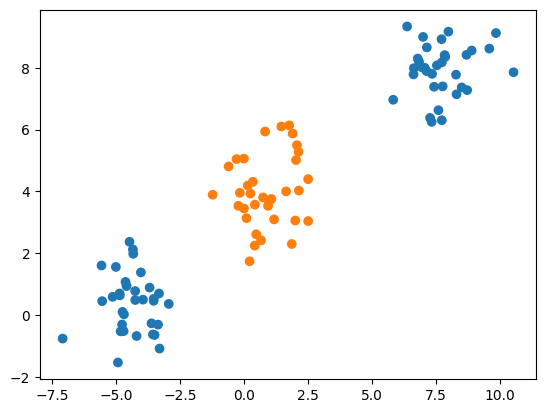

In [16]:
plt.scatter(X[:,0], X[:,1], c=plt.cm.tab10(y))

Now let us fit the data to `Polynomialfeatures` to create additional polinomial features. Check the shape of the data before and after the transformation.

In [17]:
from sklearn.preprocessing import PolynomialFeatures

In [18]:
poly = PolynomialFeatures (include_bias=False)

In [19]:
X_poly = poly.fit_transform(X)

In [20]:
X.shape

(100, 2)

In [21]:
X_poly.shape

(100, 5)

In [21]:
#x1 and x2 PolynomialFeatures

#x1 x2 x1^2 x2^2 x1*x2

#(x1x2)^2 = x1^2 + 2*x1*x2 + x2^2

#support vector machine

#we consider each data points as a vector
#all data points in my training dataset are vectors
#but only some of them will be relevant 
#in terms of seperating data into two regions

In [ ]:
#X_new = (x11, x21)
         
#Linear SVM, I will do the following:

# x11, x12, x11^2, x21^2, x11*x21 

# sign(0.13850605*x11 +  0.05989699*x12 + -0.20119627,  0.0484241 ,  0.01907115)


In [ ]:
#X_new = (x11, x21)
#sign(-0.02957404*(X_1*X_new) + (-0.00341814)*(X26*X_new) +  0.00254448,  0.03044769)

Fit `svc` with a linear kernel on the transformed dataset. Later, fit `svc` with a polynomial kernel on the original dataset. Check the coefficients, dual coefficients, and support for both linear and kernel svm models.

In [24]:
from sklearn.svm import SVC

In [25]:
linear_svm = SVC(kernel='linear').fit(X_poly,y)
ploy_svm = SVC(kernel='poly', degree=2, coef0=1).fit(X,y)

In [26]:
linear_svm.coef_

array([[ 0.13850605,  0.05989699, -0.20119627,  0.0484241 ,  0.01907115]])

In [29]:
linear_svm.dual_coef_

array([[-0.02957404, -0.00341814,  0.00254448,  0.03044769]])

In [28]:
linear_svm.support_

array([ 1, 26, 42, 62], dtype=int32)

## Example 2

In [22]:
from sklearn.model_selection import GridSearchCV, cross_val_score,train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits

Load digits dataset from scikitlearn using `load_digits()` function, create train and test datasets. Print the fitst eight digits on the screen.

Create a pipeline using `StandardScaler` and `SVC`. Find the cross validation score for both nont-scaled and scaled datasets for SVC.

In [23]:
from sklearn.pipeline import make_pipeline

Create a grid search for `C` and `gamma` parameters of `SVC`. turn the grid search results in to a dataframe and check the results.